## Part 1: Transfer Learning (Travel Planner Problem)

Import pytorch lightning moddule and the `train` function, which implements necessary modules from pytorch lightning training module. We use `TravelPlanner` later to load best models for each architecture for evaluation and profiling.

## Preparation of datasets

In [1]:
from course_small_datasets.transfer_learning import TravelPlanner, train

In [2]:
import torch
from torch.utils.data import DataLoader

from torchvision import datasets, transforms
from pytorch_lightning import seed_everything

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
seed_everything(101)

Seed set to 101


101

Root of the images for train, test and validation

In [5]:
image_path = "course_small_datasets/starter_code/part1-transfer/imagedata-50/"

Use the recommended mean and standard deviation for transformations (both train and validation/test)

In [6]:
train_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

# We'll use this for both validation and testing
val_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

In [7]:
train_dset = datasets.ImageFolder(f"{image_path}/train", transform=train_transforms)
val_dset = datasets.ImageFolder(f"{image_path}/val", transform=val_transforms)
test_dset = datasets.ImageFolder(f"{image_path}/test", transform=val_transforms)

Use the recommended batch size (`10`) and number of workers (`4`) from the starter code

In [8]:
batch_size = 10
num_workers = 4

train_loader = DataLoader(train_dset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [9]:
len(train_dset), len(val_dset), len(test_dset)

(150, 60, 48)

In [10]:
!tree -d course_small_datasets/starter_code/part1-transfer

course_small_datasets/starter_code/part1-transfer
└── imagedata-50
    ├── test
    │   ├── beach
    │   ├── desert
    │   └── forest
    ├── train
    │   ├── beach
    │   ├── desert
    │   └── forest
    └── val
        ├── beach
        ├── desert
        └── forest

14 directories


## Training of the models

For performance comparison, we choose two more pretrained networks, namely `resnet50` and `densenet121`, apart from `vgg16`.

Training for `vgg16`

In [11]:
overfit_patience = 10
epochs = 100
test_result_vgg16, best_model_path_vgg16 = train(
    "vgg16", epochs, train_loader, val_loader, test_loader, overfit_patience, device
)

/home/srn/Documents/code/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA Graphics Device') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type        

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9791666865348816
        test_loss           0.06954605132341385
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


for `resnet50`

In [12]:
test_result_resnet50, best_model_path_resnet50 = train(
    "resnet50", epochs, train_loader, val_loader, test_loader, overfit_patience, device
)

/home/srn/Documents/code/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/srn/Documents/code/venv/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/srn/Documents/code/cd12528-small-data-project-starter/saved_models exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | model   | ResNet           | 23.5 M
1 | loss_fn | CrossEntropy

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc                    1.0
        test_loss          0.055982183665037155
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


and for `densenet121`

In [13]:
test_result_densenet121, best_model_path_densenet121 = train(
    "densenet121", epochs, train_loader, val_loader, test_loader, overfit_patience, device
)

/home/srn/Documents/code/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | model   | DenseNet         | 7.0 M 
1 | loss_fn | CrossEntropyLoss | 0     
---------------------------------------------
3.1 K     Trainable params
7.0 M     Non-trainable params
7.0 M     Total params
27.828    Total estimated model params size (MB)
Metric val_loss improved. New best 

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc                    1.0
        test_loss           0.03594110161066055
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Print the summary all three models on the test dataset

In [14]:
print('VGG16 error: ', test_result_vgg16)
print('ResNet50 error: ', test_result_resnet50)
print('DenseNet121 error: ', test_result_densenet121)


VGG16 error:  [{'test_loss': 0.06954605132341385, 'test_acc': 0.9791666865348816}]
ResNet50 error:  [{'test_loss': 0.055982183665037155, 'test_acc': 1.0}]
DenseNet121 error:  [{'test_loss': 0.03594110161066055, 'test_acc': 1.0}]


While all three models accuracies are above the specified threshold of `90%`, `densenet121` has a clear edge in terms of its combined test accuracy and loss values on the given test dataset. Before profiling the selected models for speed and conclusion, however, we visualize some of the images and their lables, as requested by the project descriotion.

# Visualization of the results and testing the quality of the trained model

The instruction asks for images labeled "new" for testing and categorization. Since I didn't find suck images, I'll use the images from the `test` folder to do so. We start by loading trained models for evaluation:


In [15]:
model_vgg16 = TravelPlanner(model_name="vgg16", out_features=3)
model_vgg16.load_state_dict(torch.load(best_model_path_vgg16)["state_dict"])

model_resnet50 = TravelPlanner(model_name="resnet50", out_features=3)
model_resnet50.load_state_dict(torch.load(best_model_path_resnet50)["state_dict"])

model_densenet121 = TravelPlanner(model_name="densenet121", out_features=3)
model_densenet121.load_state_dict(torch.load(best_model_path_densenet121)["state_dict"])

<All keys matched successfully>

In the cell below we select 10 pictures from the test dataset:

In [31]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import random

# paths to test directories
test_dirs = ["beach", "desert", "forest"]
test_dirs = [image_path + "/test/" + x for x in test_dirs]

# randomly select 10 images from the test directories
selected_images = []
for category_dir in test_dirs:
    images = os.listdir(category_dir)
    selected_images.extend(random.sample([(category_dir, img) for img in images], k=3))

# add one more image
extra_images = os.listdir(test_dirs[0])
selected_images.append((test_dirs[0], random.choice(extra_images)))

and some helpers for identifying labels:

In [32]:
def get_category_from_path(path: str):
    if path.find("beach") >= 0:
        return 'beach'
    if path.find("desert") >= 0:
        return 'desert'
    if path.find("forest") >= 0:
        return 'forest'

def get_category_from_prediction(cat : int):
    if cat == 0:
        return 'beach'
    if cat == 1:
        return 'desert'
    if cat == 2:
        return 'forest'

We only select one of the models (`vgg16` in this case since it has the lowest prediction quality among the three) to showcase the prediction since all three have perfect or close to perdect prediction quality. The code below is functionally similar to the code in the starter code but organizes the pictures in a grid of `2x5`.

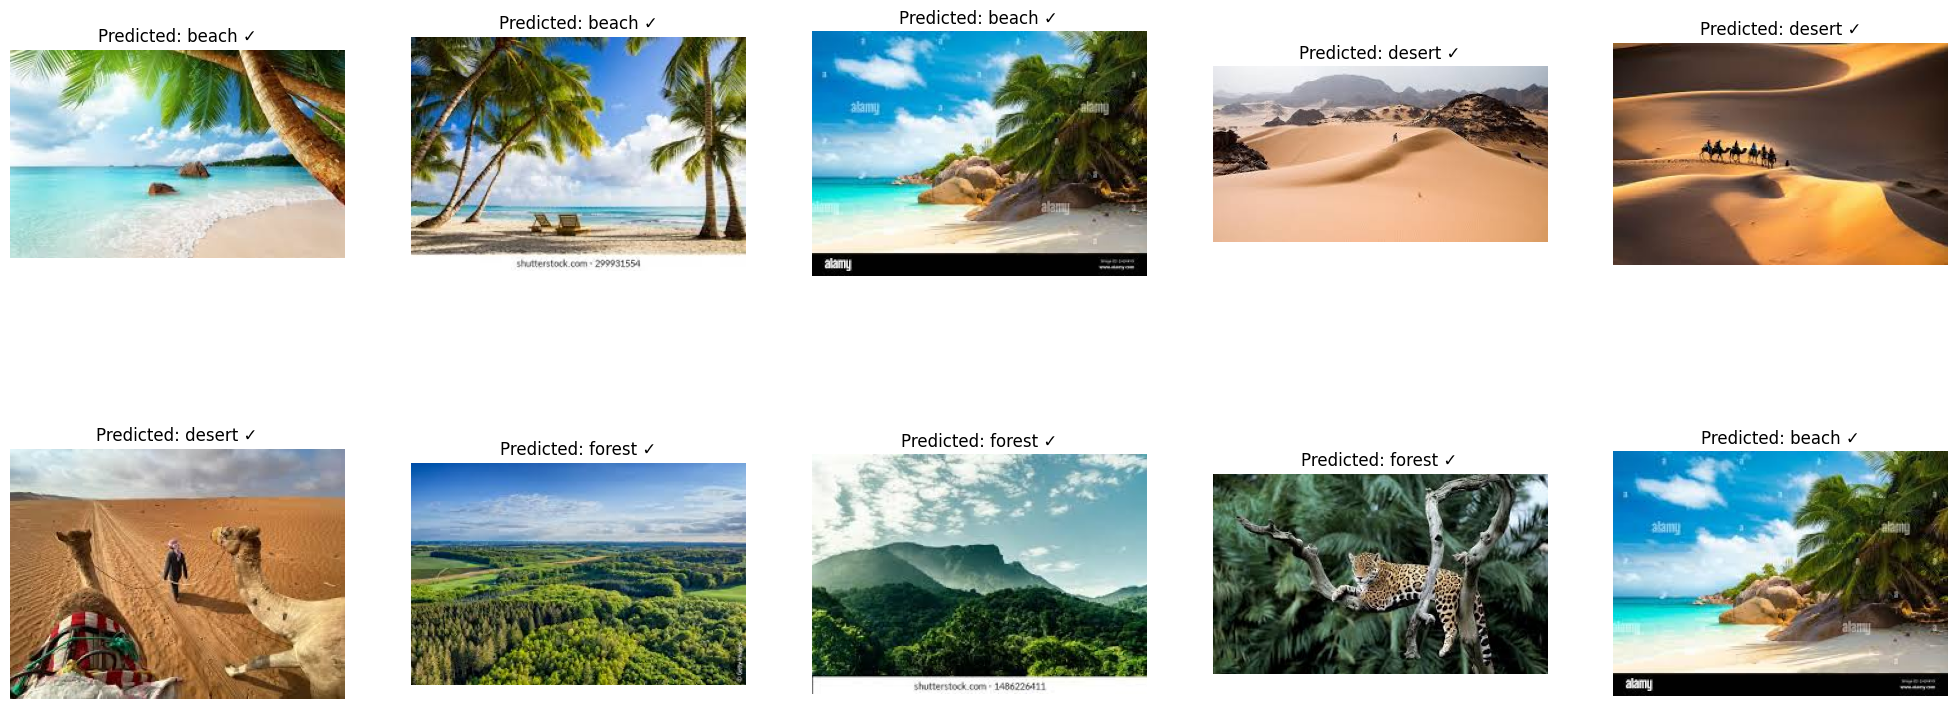

In [35]:
_, axes = plt.subplots(2, 5, figsize=(25, 10))

model_vgg16.eval()

for ax, (dir_path, img_name) in zip(axes.ravel(), selected_images):
    img_path = os.path.join(dir_path, img_name)
    img = Image.open(img_path).convert("RGB")
    input_tensor = val_transforms(img)
    input_batch = input_tensor.unsqueeze(
        0
    )  

    with torch.no_grad():
        output = model_vgg16(input_batch)

    predicted_class = output.argmax(dim=1).item()

    matched = get_category_from_path(dir_path) == get_category_from_prediction(predicted_class)

    ax.imshow(np.asarray(img))
    ax.set_title(
        f"Predicted: {get_category_from_prediction(predicted_class)} {'✓' if matched else 'x'}"
    )
    ax.axis("off")

As expected, the tarined model achieved more than `90%` correct prediction quality (in this case all of them), as indicated by the test accuracy of `0.97` for `vgg16`.

# Timing of the models

In this section we test the trained models on the set of above pictures to see  how long it takes for the models to do inference on those images. First we set the models to eval mode and move them to cpu

In [19]:
model_vgg16.eval()
model_resnet50.eval()
model_densenet121.eval()

model_vgg16.to('cpu')
model_resnet50.to('cpu')
model_densenet121.to('cpu');

Put the selected images into a list for inference

In [20]:
input_tensors = []

for _, (dir_path, img_name) in enumerate(selected_images):
    img_path = os.path.join(dir_path, img_name)
    img = Image.open(img_path).convert("RGB")
    input_tensor = val_transforms(img)
    input_tensors.append(input_tensor.unsqueeze(0))

##### Timing for VGG16

In [21]:
%%timeit

with torch.no_grad():
    for t in input_tensors:
        _ = model_vgg16(t)

546 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### Timing for ResNet50

In [22]:
%%timeit

with torch.no_grad():
    for t in input_tensors:
        _ = model_resnet50(t)

282 ms ± 5.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### Timing for DenseNet121

In [23]:
%%timeit

with torch.no_grad():
    for t in input_tensors:
        _ = model_densenet121(t)

329 ms ± 2.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Conclusion

While the densenet121 achieved the lowest test score among the models, it has a higher inference time compared to ResNet50, which has a similar test score. It is therefore recommended to use Resnet50 for this transfer learning task.


## Further Improvements

A couple of improvements can be made in this work, that are not shown here. An obvious next step would be to do quantization and prunning of the trained networks, to further reduce the model size as well as the inference FLOPs. This can be done iteratively, as in `train -> prune -> quantize -> ...` while monitoring the test scores to make sure that the resulted models' prediction qualitites are not degraded beyond a certain threshold. 